<a href="https://colab.research.google.com/github/ImalkaPrasadini/Bigdata_Spark/blob/main/Final_Project_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os,sys
# from google.colab import drive
# drive.mount('/content/MyDrive')
# nb_path = '/content/notebooks'
# os.symlink('/content/MyDrive/My Notebooks/Colab Notebooks', nb_path)
# sys.path.insert(0,nb_path)

# **Download Java**

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#  **Install Apache Spark 3.0.1 with Hadoop 2.7**

In [3]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# **Unzip Folder**

In [4]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# **Install Find Spark**

> It will locate Spark on the system and import it as a regular library.



In [5]:
!pip install -q findspark

# **Settin up Envirnmental Variables**


> This will enable us to run Pyspark in the Colab environment.



In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [7]:
import findspark
findspark.init()

In [9]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

# **Loading data to PySpark**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions as f

**TASK 06 : The number of accidents which occur due to traffic violations based on vehicle type.** 

In [40]:
# Load data to Task 06.
df_task1 = spark.read.csv('/content/sample_data/Traffic_Violations.csv',header=True)
#df_task1.show(df_task1.count(),truncate = False)

**Schema of DataFrame**

Shows data type and the nullable conditions for that particular column.

In [41]:
df_task1.printSchema()

root
 |-- Date Of Stop: string (nullable = true)
 |-- Time Of Stop: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- SubAgency: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Accident: string (nullable = true)
 |-- Belts: string (nullable = true)
 |-- Personal Injury: string (nullable = true)
 |-- Property Damage: string (nullable = true)
 |-- Fatal: string (nullable = true)
 |-- Commercial License: string (nullable = true)
 |-- HAZMAT: string (nullable = true)
 |-- Commercial Vehicle: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Work Zone: string (nullable = true)
 |-- State: string (nullable = true)
 |-- VehicleType: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Violati

**Describing a Particular**

Summary of any particular column of a DataFrame.Gives statistical summary of the given column, if not specified, it provides the statistical summary of the DataFrame.

In [42]:
df_task1.describe().show()
#fifa_df.describe('Position').show()

+-------+------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------+---------------+---------------+-------+------------------+-------+------------------+------------------+---------+------------------+---------------+------------------+--------+---------+-------+--------------+-----------------+---------+-----------------------+-------+-----------------+--------------------+------------+--------+-----------------+--------------------+
|summary|Date Of Stop|        Time Of Stop|             Agency|           SubAgency|         Description|            Location|            Latitude|         Longitude|           Accident|  Belts|Personal Injury|Property Damage|  Fatal|Commercial License| HAZMAT|Commercial Vehicle|           Alcohol|Work Zone|             State|    VehicleType|              Year|    Make|    Model|  Color|Violation Type|           Charge|  Article|C

In [43]:
# Remove null values
df_task1.dropna(subset=["VehicleType"])


DataFrame[Date Of Stop: string, Time Of Stop: string, Agency: string, SubAgency: string, Description: string, Location: string, Latitude: string, Longitude: string, Accident: string, Belts: string, Personal Injury: string, Property Damage: string, Fatal: string, Commercial License: string, HAZMAT: string, Commercial Vehicle: string, Alcohol: string, Work Zone: string, State: string, VehicleType: string, Year: string, Make: string, Model: string, Color: string, Violation Type: string, Charge: string, Article: string, Contributed To Accident: string, Race: string, Gender: string, Driver City: string, Driver State: string, DL State: string, Arrest Type: string, Geolocation: string]

In [45]:
df_task1.select('VehicleType','Contributed To Accident')

DataFrame[VehicleType: string, Contributed To Accident: string]

+--------------------+-----------------------+-------------------+
|         VehicleType|Contributed To Accident|Number of Accidents|
+--------------------+-----------------------+-------------------+
| 27 - Farm Equipment|                    Yes|                 10|
|          28 - Other|                    Yes|                645|
|     12 - School Bus|                    Yes|                 64|
|    22 - Mobile Home|                    Yes|                  1|
|     02 - Automobile|                    Yes|              27030|
|   09 - Farm Vehicle|                    Yes|                  6|
|     01 - Motorcycle|                    Yes|                378|
| 21 - Tandem Trailer|                    Yes|                  1|
|   26 - Boat Trailer|                    Yes|                  1|
| 20 - Commercial Rig|                    Yes|                 35|
|          19 - Moped|                    Yes|                 16|
|08 - Recreational...|                    Yes|                

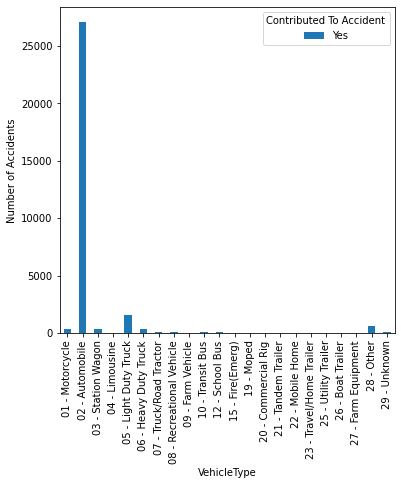

In [49]:
# Filter the data where accidents occur
df_task1 = df_task1.where(df_task1['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task1.groupby(["VehicleType","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

# Dipaly Data
group_data.show()

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="VehicleType",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(6, 6)

# Change the axes labels
ax.set_xlabel("VehicleType")
ax.set_ylabel("Number of Accidents")
figsize=(15, 10)
plt.xticks(rotation=90)
# Visualize the data
plt.show()




**Task 15-Correlation between accidents and time of the day.ipynb**

In [50]:
# Load data to Task 15.
df_task15 = spark.read.csv('/content/sample_data/Traffic_Violations.csv',header=True)
#df_task15.show()

In [51]:
df_task15.printSchema()

root
 |-- Date Of Stop: string (nullable = true)
 |-- Time Of Stop: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- SubAgency: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Accident: string (nullable = true)
 |-- Belts: string (nullable = true)
 |-- Personal Injury: string (nullable = true)
 |-- Property Damage: string (nullable = true)
 |-- Fatal: string (nullable = true)
 |-- Commercial License: string (nullable = true)
 |-- HAZMAT: string (nullable = true)
 |-- Commercial Vehicle: string (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Work Zone: string (nullable = true)
 |-- State: string (nullable = true)
 |-- VehicleType: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Violati

In [52]:
df_task15.describe().show()

+-------+------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+-------+---------------+---------------+-------+------------------+-------+------------------+------------------+---------+------------------+---------------+------------------+--------+---------+-------+--------------+-----------------+---------+-----------------------+-------+-----------------+--------------------+------------+--------+-----------------+--------------------+
|summary|Date Of Stop|        Time Of Stop|             Agency|           SubAgency|         Description|            Location|            Latitude|         Longitude|           Accident|  Belts|Personal Injury|Property Damage|  Fatal|Commercial License| HAZMAT|Commercial Vehicle|           Alcohol|Work Zone|             State|    VehicleType|              Year|    Make|    Model|  Color|Violation Type|           Charge|  Article|C

+----+-----------------------+-------------------+
|hour|Contributed To Accident|Number of Accidents|
+----+-----------------------+-------------------+
|   0|                    Yes|              35335|
|   1|                    Yes|              25193|
|   2|                    Yes|              23737|
|   3|                    Yes|              28978|
|   4|                    Yes|              13772|
|   5|                    Yes|              10112|
|   6|                    Yes|              13849|
|   7|                    Yes|              30107|
|   8|                    Yes|              44577|
|   9|                    Yes|              35228|
|  10|                    Yes|              23975|
|  11|                    Yes|              28098|
|  12|                    Yes|              29411|
|  13|                    Yes|              28311|
|  14|                    Yes|              34053|
|  15|                    Yes|              45608|
|  16|                    Yes| 

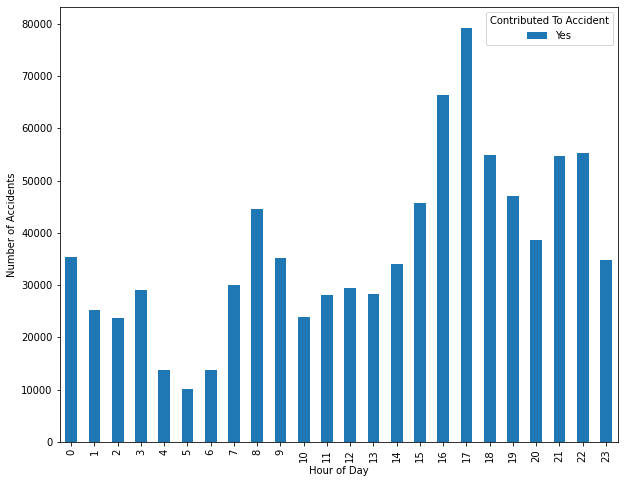

In [53]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

# Filter the data where accidents occur
df_task15 = df_task15.where(df_task15['Contributed to Accident'] == 'Yes')

#Get time and whethere there have accident or not 
df_task15 = df_task15.select('Time Of Stop','Contributed To Accident')

#Sort above based on time
#sorted=group_data.orderBy('Time Of Stop')
#sorted.show()

# Here contain 24hr clock. To get more simple consider only the hour that accident is happened. 
#Take the hour for each timestamp
sorted = (df_task15.select("Time Of Stop")
    .withColumn("hour", hour("Time Of Stop")))
#sorted.show()

#Join above datafrmaes by outter join.
df = df_task15.join(sorted, on=['Time Of Stop'], how='outer')
#df.show()


# Group data from Vehicle type.
group_data = df.groupby(["hour","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")

group_data=group_data.orderBy('hour')

# Dipaly Data
group_data.show()


### To Plot the Data in Chart


# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="hour",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")
#plt.xticks(rotation=90)

# Visualize the data
plt.show()



In [54]:
# To find the correlation among
# the columns using pearson method
df_pandas.corr(method ='pearson')

,hour,Number of Accidents
hour,1.000000,0.644183
Number of Accidents,0.644183,1.000000


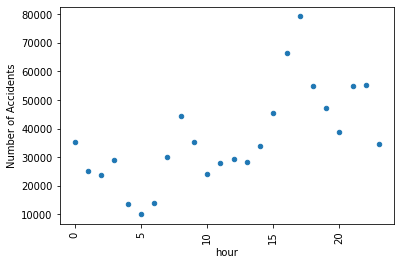

In [56]:
# import required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# importing libraries
  
df_pandas.plot.scatter(x ='hour', y ='Number of Accidents')
plt.xticks(rotation=90)
plt.show()

#ax2 = df_pandas.plot.scatter(x='hour',
#                      y='Number of Accidents',
                     # c='Contributed To Accident',
 #                     colormap='viridis')

**TASK 08 : Whether there is a relationship between manufacturer of the vehicle and accidents.**

In [58]:
# Load data to Extract year.
df_task8 = spark.read.csv('/content/sample_data/Traffic_Violations.csv',header=True)


In [60]:
df_task8.select('Make','Contributed To Accident')

DataFrame[Make: string, Contributed To Accident: string]

In [71]:
# Filter the data where accidents occur
df_task8 = df_task8.where(df_task8['Contributed to Accident'] == 'Yes')

# Group data from Vehicle type.
group_data = df_task8.groupby(["Make","Contributed To Accident"]).agg({"Contributed To Accident":"count"})
group_data = group_data.withColumnRenamed("count(Contributed To Accident)","Number of Accidents")


group_data.count().filter("`count` >= 10").orderBy('count', ascending=False)


# Dipaly Data
group_data.show()

AnalysisException: ignored

In [68]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext


### To Plot the Data in Chart


# convert DataFrame into Pandas
df_pandas = group_data.toPandas()
df_pandas

# Creating dimensions(VehicleType,Contributed To Accident,count)
df_pivot = pd.pivot_table(
	df_pandas,
	values="Number of Accidents",
	index="Make",
	columns="Contributed To Accident",
	aggfunc=np.sum
)

# Plot a bar chart using the DF
ax=df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(200, 150)

# Change the axes labels
ax.set_xlabel("Manufacture")
ax.set_ylabel("Number of Accidents")
#plt.xticks(rotation=90)

# Visualize the data
plt.show()

